In [1]:
import pandas as pd

df = pd.read_csv("twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [2]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [3]:
df.isnull().sum()
df.dropna(inplace=True)

In [5]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [6]:
df = pd.read_csv("twitter_training.csv", 
                 header=None, 
                 names=["ID", "Entity", "Sentiment", "Tweet"])

In [8]:
df["Tweet"] = df["Tweet"].astype(str)

In [9]:
df["Clean_Tweet"] = df["Tweet"].apply(clean_text)

In [10]:
df[["Tweet", "Clean_Tweet"]].head()

,Tweet,Clean_Tweet
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [11]:
df["Sentiment"].value_counts()

Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

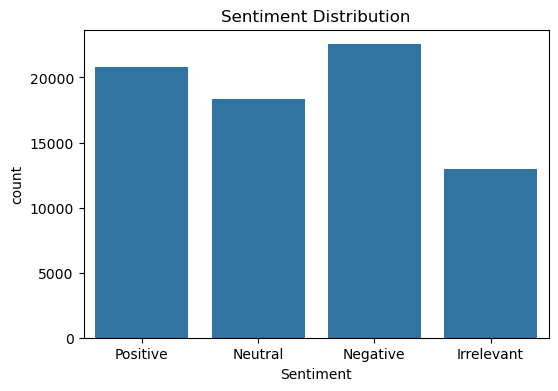

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

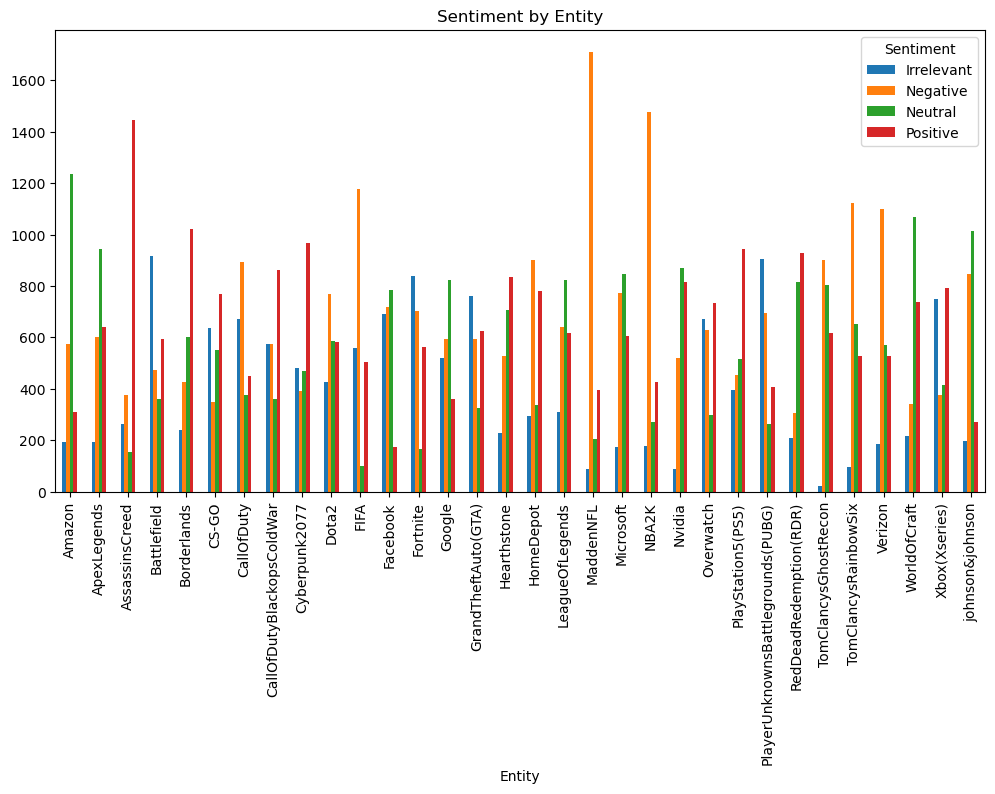

In [13]:
entity_sentiment = df.groupby(["Entity", "Sentiment"]).size().unstack()

entity_sentiment.plot(kind="bar", figsize=(12,6))
plt.title("Sentiment by Entity")
plt.show()

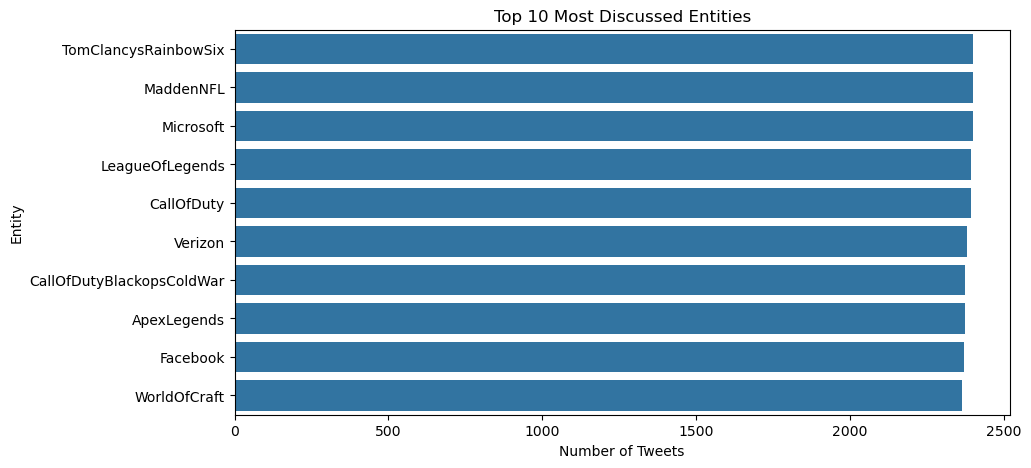

In [16]:
top_entities = df["Entity"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_entities.values, y=top_entities.index)
plt.title("Top 10 Most Discussed Entities")
plt.xlabel("Number of Tweets")
plt.ylabel("Entity")
plt.show()

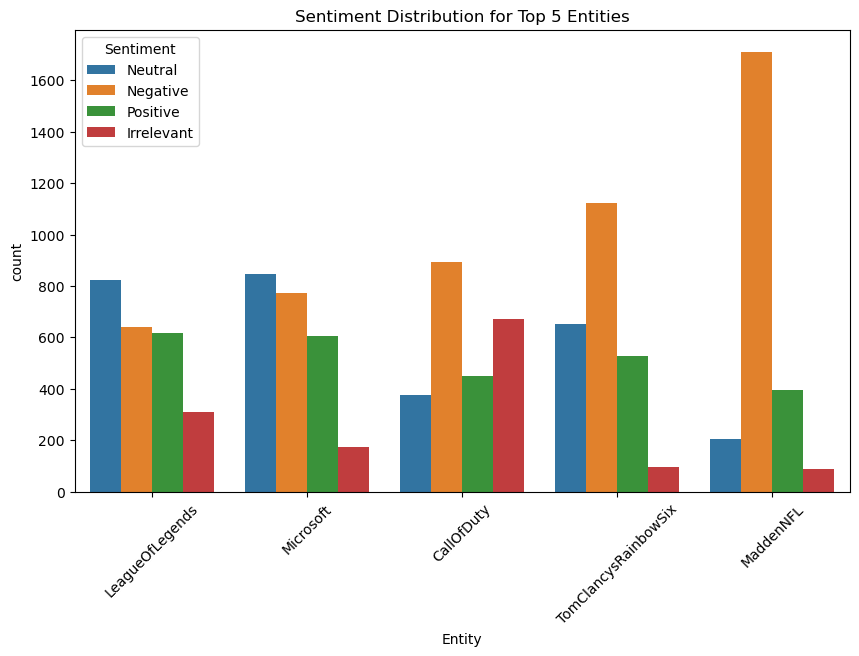

In [17]:
top5 = df["Entity"].value_counts().head(5).index
filtered_df = df[df["Entity"].isin(top5)]

plt.figure(figsize=(10,6))
sns.countplot(data=filtered_df, x="Entity", hue="Sentiment")
plt.title("Sentiment Distribution for Top 5 Entities")
plt.xticks(rotation=45)
plt.show()

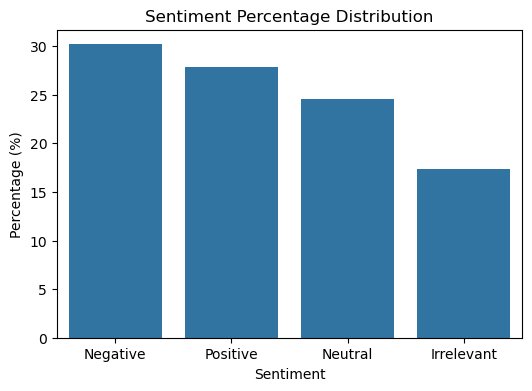

In [18]:
sentiment_percent = df["Sentiment"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_percent.index, y=sentiment_percent.values)
plt.title("Sentiment Percentage Distribution")
plt.ylabel("Percentage (%)")
plt.show()

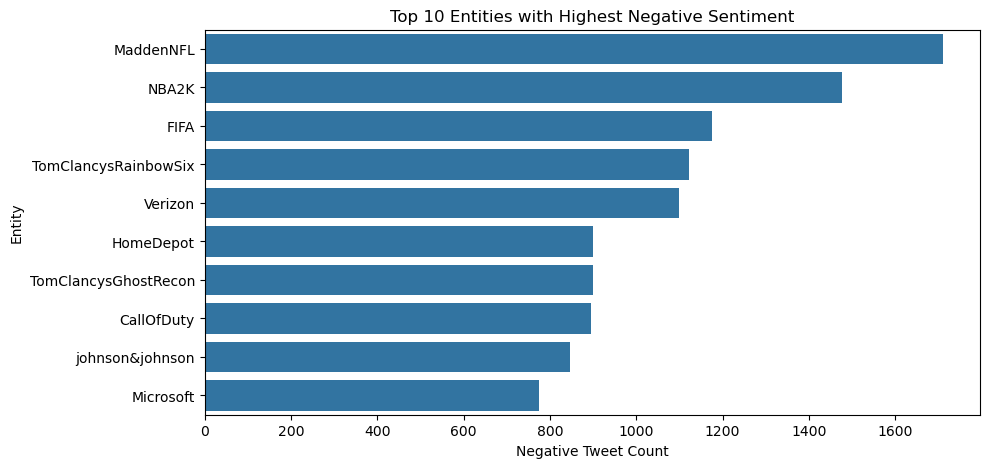

In [19]:
negative_df = df[df["Sentiment"] == "Negative"]
neg_counts = negative_df["Entity"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=neg_counts.values, y=neg_counts.index)
plt.title("Top 10 Entities with Highest Negative Sentiment")
plt.xlabel("Negative Tweet Count")
plt.show()